In [112]:
import pandas as pd
import sqlite3
import plotly.express as px
from datetime import date, datetime
import plotly.graph_objects as go

In [5]:
con = sqlite3.connect('contrcalc.db')
contracts_df = pd.read_sql('Select * FROM contracts', con, index_col='contract_id',  parse_dates=['date_closure', 'date_fullfillment'])

In [6]:
contracts_df

,commodity_id,price_per_to,amount_to,date_closure,date_fullfillment
contract_id,,,,,
1,2,250.0,1000.0,2022-05-18,2022-11-30
2,2,330.0,300.0,2022-05-01,2022-11-16
3,2,300.0,300.0,2022-05-11,2022-11-16


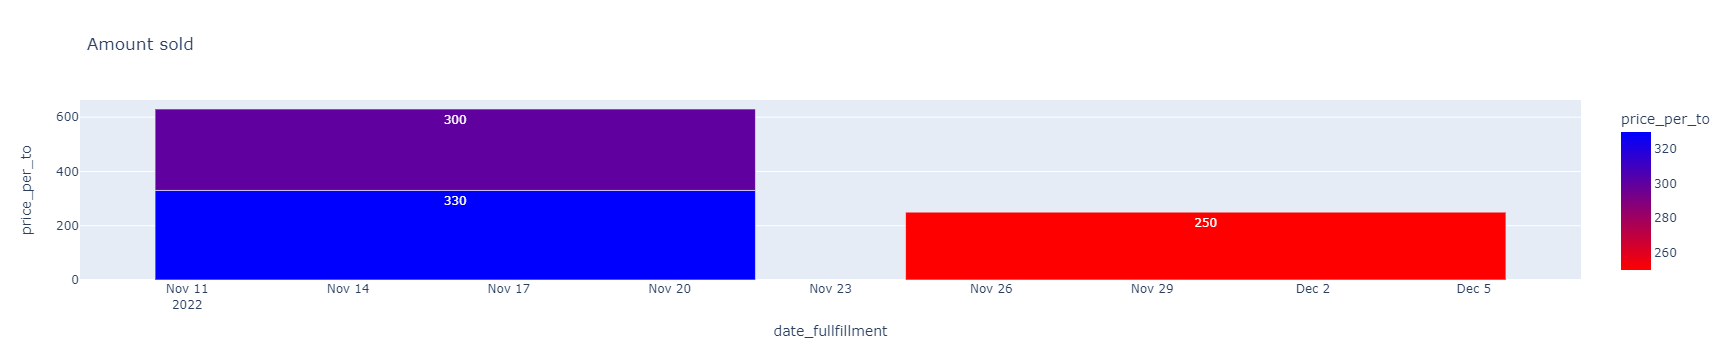

In [102]:
fig = px.bar(contracts_df, x="date_fullfillment",
             y="price_per_to", color="price_per_to",
             title="Amount sold",
             color_continuous_scale='Bluered_r',
            hover_name="date_closure",
            text_auto=True)
fig.show()

In [50]:
harvest_tph = 8
harvest_area = 250
harvest = {'harvest_tph':harvest_tph, 'harvest_area':harvest_area}


In [48]:
querry=("""
INSERT INTO commodities (estimate_harvest_to, area_planted)
VALUES (?, ?)
WHERE commodity_id = '2';
""") 

In [49]:
try:
    con = sqlite3.connect('contrcalc.db')
    print("Connected to SQLite")
    cur = con.cursor()
    cur.executemany(querry, harvest)
    con.commit()
    print("Total", cur.rowcount, "Records inserted successfully into SqliteDb_developers table")
    con.commit()
    cur.close()
except sqlite3.Error as error:
        print("Failed to insert multiple records into sqlite table", error)
finally:
    if (con):
        con.close()
        print("The SQLite connection is closed")

Connected to SQLite
Failed to insert multiple records into sqlite table near "WHERE": syntax error
The SQLite connection is closed


In [55]:
con = sqlite3.connect('contrcalc.db')
commodities_df = pd.read_sql("Select * from commodities", con, index_col='commodity_id')
commodities_df

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted
commodity_id,,,,,,
1,barley,6,8,7.88,None,None
2,wheat,8,9,6.40,None,None
3,corn,9,4,8.20,None,None
4,rapeseed,7,8,3.69,None,None


In [53]:
harvest['total_harvest']= harvest['harvest_tph']*harvest['harvest_area']
harvest

{'harvest_tph': 8, 'harvest_area': 250, 'total_harvest': 2000}

In [70]:
month

commodity_id
1    6
2    8
3    9
4    7
Name: harvest_month, dtype: int64

In [78]:
 
commodities_df['next_harvest_date'] =  [datetime.strptime(f'2022/{month}/01', "%Y/%m/%d") for month in commodities_df['harvest_month']]

In [98]:
commodities_df['estimate_harvest_to']= [8,6.3, 8, 3.5]
commodities_df['area_planted']	 = [80, 120, 50, 60]
commodities_df['total_harvest']=commodities_df['estimate_harvest_to']*commodities_df['area_planted']	

In [99]:
commodities_df

,name,harvest_month,sowing_month,reference_harvest_to,estimate_harvest_to,area_planted,next_harvest_date,total_harvest
commodity_id,,,,,,,,
1,barley,6,8,7.88,8.0,80,2022-06-01,640.0
2,wheat,8,9,6.40,6.3,120,2022-08-01,756.0
3,corn,9,4,8.20,8.0,50,2022-09-01,400.0
4,rapeseed,7,8,3.69,3.5,60,2022-07-01,210.0


In [87]:
type(commodities_df['harvest_month'][2])

numpy.int64

In [106]:
contracts_df["date_fullfillment"]

contract_id
1   2022-11-30
2   2022-11-16
3   2022-11-16
Name: date_fullfillment, dtype: datetime64[ns]

In [107]:
commodities_df['next_harvest_date']

commodity_id
1   2022-06-01
2   2022-08-01
3   2022-09-01
4   2022-07-01
Name: next_harvest_date, dtype: datetime64[ns]

In [115]:
fig = go.Figure()

fig.add_trace(go.bar(data_frame= commodities_df, x='next_harvest_date',
             y='total_harvest',
             title="Expected total harvest",
             color='name',
            text_auto=True,
            pattern_shape="name"))
fig.add_trace(go.bar(contracts_df, x="date_fullfillment",
             y="price_per_to", color="price_per_to",
             title="Amount sold",
             color_continuous_scale='Bluered_r',
            hover_name="date_closure",
            text_auto=True))
fig.show()

TypeError: 'module' object is not callable